end_date is initialized to "2020-09-09"


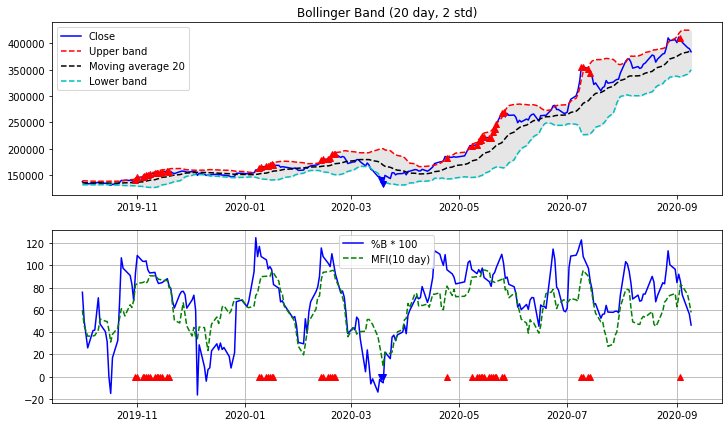

In [1]:
# Source: 파이썬 증권데이터 분석 by 김황후

import matplotlib.pyplot as plt
from Investar import Analyzer
%matplotlib inline

mk = Analyzer.MarketDB()
df = mk.get_daily_price('카카오', '2019-09-02')

df['MA20'] = df['close'].rolling(window=20).mean()
df['stddev'] = df['close'].rolling(window=20).std()
df['upper'] = df['MA20'] + (df['stddev'] * 2)
df['lower'] = df['MA20'] - (df['stddev'] * 2)
df['PB'] = (df['close'] - df['lower'])/(df['upper']-df['lower'])
df['TP'] = (df['high'] + df['low'] + df['close'])/3
df['PMF'] = 0
df['NMF'] = 0

for i in range(len(df.close)-1): #0부터 종가의 개수 -2까지
    if df.TP.values[i] < df.TP.values[i+1]:
        df.PMF.values[i+1] = df.TP.values[i+1] * df.volume.values[i+1]
        df.NMF.values[i+1] = 0
    else:
        df.NMF.values[i+1] = df.TP.values[i+1] * df.volume.values[i+1]
        df.PMF.values[i+1] = 0
df['MFR'] = df.PMF.rolling(window=10).sum() / df.NMF.rolling(window=10).sum()
df['MFI10'] = 100 - 100 / (1+df['MFR'])

df = df[19:]

plt.figure(figsize=(12,7))
plt.subplot(2,1,1)
plt.plot(df.index, df['close'], color = '#0000ff', label = 'Close')
plt.plot(df.index, df['upper'], 'r--', label = 'Upper band')
plt.plot(df.index, df['MA20'], 'k--', label = 'Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label = 'Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')
plt.legend(loc='best')
plt.title('Bollinger Band (20 day, 2 std)')
for i in range(len(df.close)):
    if df.PB.values[i] > 0.8 and df.MFI10.values[i] > 80:
        plt.plot(df.index.values[i], df.close.values[i], 'r^')
    elif df.PB.values[i] < 0.2 and df.MFI10.values[i] < 20:
        plt.plot(df.index.values[i], df.close.values[i], 'bv')

plt.subplot(2,1,2)
plt.plot(df.index, df['PB']*100, 'b', label = '%B * 100')
plt.plot(df.index, df['MFI10'], 'g--', label = 'MFI(10 day)')
plt.yticks([-20, 0 , 20, 40, 60, 80, 100, 120])
for i in range(len(df.close)):
    if df.PB.values[i] > 0.8 and df.MFI10.values[i] > 80:
        plt.plot(df.index.values[i], 0, 'r^')
    elif df.PB.values[i] < 0.2 and df.MFI10.values[i] < 20:
        plt.plot(df.index.values[i], 0, 'bv')
plt.grid(True)
plt.legend(loc='best')
plt.show()